Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

National average of $1,730 per year or $144 per month for full coverage

(1) State Farm:
Coverage Type	      Cost Per Month	Cost Per Year
Full coverage	            $104	       $1,250
Minimum coverage	        $52	           $625


Updated: Aug 10, 2023:
Car Insurance Provider	Average Monthly Cost	Average Annual Cost
USAA	                      $88	                  $1,054
Erie Insurance	              $103	                  $1,238
Nationwide	                  $107	                  $1,281
Geico	                      $109	                  $1,308
Auto-Owners Insurance	      $111	                  $1,337
State Farm	                  $123	                  $1,481
American Family Insurance	  $128	                  $1,537
Progressive	                  $134	                  $1,611
Travelers	                  $139	                  $1,669
Allstate	                  $174	                  $2,088
Farmers	                      $178	                  $2,140

Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

- In 2023 there are a projected 243.4 million licensed drivers in the US, which includes 89% of US adults.

Updated: Aug 17 2023
The vast majority of drivers have comprehensive and collision coverage. In addition to buying liability car insurance, 79% of insured drivers buy comprehensive coverage and 75% purchase collision coverage. One in eight drivers has no car insurance (12.6%).

Collision claims are claims to an insurance company or payment of cost in repairing one's vehicle regardless of who is at fault for the damage. According to the car insurance claims database from 2018, 6.1% of all collision insurance policyholders in the US had a claim.

Inladen van modules en df:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math









In [2]:
df = pd.read_csv('US_Accidents_March23.csv')
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["End_Time"] = pd.to_datetime(df["End_Time"], errors="coerce")
df["Year"]=df["Start_Time"].dt.year
df['Year'] = df['Year'].astype(str)
#df = df[df['Year'].isin([2020, 2021, 2022])]
df = df.drop(['End_Lat', 'End_Lng', 'Description', 'Wind_Chill(F)', 'Precipitation(in)', 'Source', 'Severity', 'Distance(mi)', 'Street','Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Start_Lat', 'Start_Lng'], axis=1)

Algemene explorative data

In [3]:
print(df.columns)
df.info()
df.head()

Index(['ID', 'Start_Time', 'End_Time', 'City', 'County', 'State', 'Year'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ID          object        
 1   Start_Time  datetime64[ns]
 2   End_Time    datetime64[ns]
 3   City        object        
 4   County      object        
 5   State       object        
 6   Year        object        
dtypes: datetime64[ns](2), object(5)
memory usage: 412.7+ MB


,ID,Start_Time,End_Time,City,County,State,Year
0,A-1,2016-02-08 05:46:00,2016-02-08 11:00:00,Dayton,Montgomery,OH,2016
1,A-2,2016-02-08 06:07:59,2016-02-08 06:37:59,Reynoldsburg,Franklin,OH,2016
2,A-3,2016-02-08 06:49:27,2016-02-08 07:19:27,Williamsburg,Clermont,OH,2016
3,A-4,2016-02-08 07:23:34,2016-02-08 07:53:34,Dayton,Montgomery,OH,2016
4,A-5,2016-02-08 07:39:07,2016-02-08 08:09:07,Dayton,Montgomery,OH,2016


In [4]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

C:\Users\Bart\AppData\Local\Temp\ipykernel_18208\1249180590.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  statistieken = df.describe()
C:\Users\Bart\AppData\Local\Temp\ipykernel_18208\1249180590.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  statistieken = df.describe()


Basisstatistieken voor numerieke kolommen:
             ID           Start_Time             End_Time     City  \
count   7728394              7728394              7728394  7728141   
unique  7728394              5801064              6463024    13678   
top         A-1  2021-01-26 16:16:13  2021-11-22 08:00:00    Miami   
freq          1                  253                  129   186917   
first       NaN  2016-01-14 20:18:33  2016-02-08 06:37:08      NaN   
last        NaN  2023-03-31 23:30:00  2023-03-31 23:59:00      NaN   

             County    State     Year  
count       7728394  7728394  7728394  
unique         1871       49        8  
top     Los Angeles       CA     2022  
freq         526851  1741433  1762452  
first           NaN      NaN      NaN  
last            NaN      NaN      NaN  

Modus voor alle kolommen:
               ID          Start_Time            End_Time   City       County  \
0             A-1 2021-01-26 16:16:13 2021-11-22 08:00:00  Miami  Los Angeles 

df schoonmaken 

specifieke slechte data aantekeningen

In [5]:
# Get columns with missing values and the number of missing values in each column
columns_with_missing_values = df.columns[df.isnull().any()]
missing_values_per_column = df[columns_with_missing_values].isnull().sum()

# Iterate through columns with missing values and print the information
for column in columns_with_missing_values:
    missing_count = missing_values_per_column[column]
    print(f'"{column}" heeft {missing_count} missende waardes')

"City" heeft 253 missende waardes


Data op landelijke schaal (Bart)

In [6]:
severity_counts = df['Severity'].value_counts().sort_index()
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']
plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title('Severity Distribution', fontsize=16)
plt.legend(title='Severity', loc='upper right', labels=['Severity ' + str(s) for s in severity_counts.index])
plt.axis('equal')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


KeyError: 'Severity'

Total time of accidents

In [ ]:
df_time = df[df['Year'].isin([2020, 2021, 2022])]
df_time = df_time.dropna(subset=['Start_Time'])
df_time["Month"]=df_time["Start_Time"].dt.month_name()
df_time["Day"]=df_time["Start_Time"].dt.day_name()
df_time['Hour']=df_time['Start_Time'].dt.hour
df_time['Hour'] = df_time['Hour'].astype(str)
df_time = df_time.drop(['ID', 'End_Time', 'Start_Time', 'City', 'County', 'State'], axis=1)
df_time = df_time.dropna()

order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order_year = ['2020', '2021', '2022']
order_hour = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22','23']
df_time['Year'] = pd.Categorical(df_time['Year'], categories=order_year, ordered=True)
df_time['Month'] = pd.Categorical(df_time['Month'], categories=order_month, ordered=True)
df_time['Day'] = pd.Categorical(df_time['Day'], categories=order_day, ordered=True)
df_time['Hour'] = pd.Categorical(df_time['Hour'], categories=order_hour, ordered=True)

df_time = df_time.sort_values(['Year', 'Month', 'Day', 'Hour'])

df_time = df_time.reset_index(drop=True)
df_time = df_time.melt(var_name='Date_Type', value_name='Value')

value_to_code = {}
code = 0

for value in df_time['Value'].unique():
    value_to_code[value] = f'{code:02d}'
    code += 1

# Map the 'Value' column to 'Order' based on the dictionary
df_time['Order'] = df_time['Value'].map(value_to_code)

df_time.head()
df_time.to_csv('Accidents_time.csv', index=False)


In [ ]:
order_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order_year = ['2020', '2021', '2022']
order_hour = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22','23']
df_time['Year'] = pd.Categorical(df_time['Year'], categories=order_year, ordered=True)
df_time['Month'] = pd.Categorical(df_time['Month'], categories=order_month, ordered=True)
df_time['Day'] = pd.Categorical(df_time['Day'], categories=order_day, ordered=True)
df_time['Hour'] = pd.Categorical(df_time['Hour'], categories=order_hour, ordered=True)

# Sort the DataFrame
df_time = df_time.sort_values(['Year', 'Month', 'Day', 'Hour'])

# Reset index if needed
df_time = df_time.reset_index(drop=True)

df_time.head(50)

,Year,Month,Day,Hour
0,2020,January,Monday,0
1,2020,January,Monday,0
2,2020,January,Monday,0
3,2020,January,Monday,0
4,2020,January,Monday,0
5,2020,January,Monday,0
6,2020,January,Monday,0
7,2020,January,Monday,0
8,2020,January,Monday,0
9,2020,January,Monday,0


In [ ]:
df_time['Duration'] = df_time.End_Time - df_time.Start_Time 
df_time['Duration'] = df_time['Duration'].apply(lambda x:round(x.total_seconds() / 60) )

conditions = [
    (df_time['Duration'] < 30),
    (df_time['Duration'] >= 30) & (df_time['Duration'] <= 60),
    (df_time['Duration'] > 60) & (df_time['Duration'] <= 120),
    (df_time['Duration'] > 120)
]

delay_values = ['30m', '60m', '120m', '>120m']

df_time['Delay'] = np.select(conditions, delay_values, default=None)

# Convert the 'Delay' column to object strings
df_time['Delay'] = df_time['Delay'].astype(str)
df_time = df_time.dropna(subset=['Delay'])
#grafiek hier van
#kijken naar verschil binnen severities


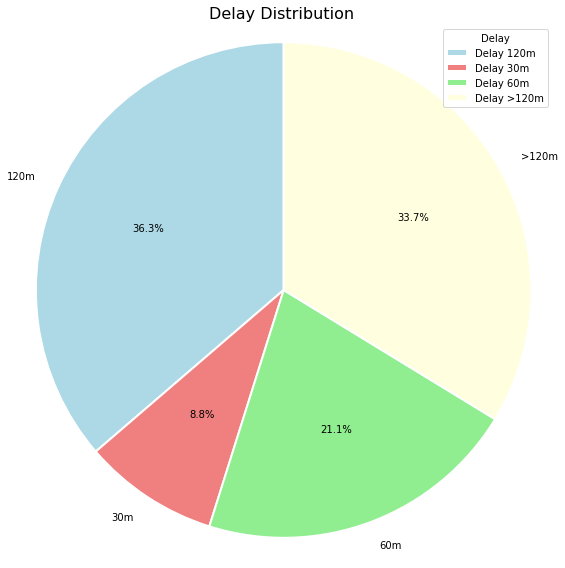

In [ ]:
severity_counts = df_time['Delay'].value_counts().sort_index()
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']
plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title('Delay Distribution', fontsize=16)
plt.legend(title='Delay', loc='upper right', labels=['Delay ' + str(s) for s in severity_counts.index])
plt.axis('equal')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()

Time/Period of accidents

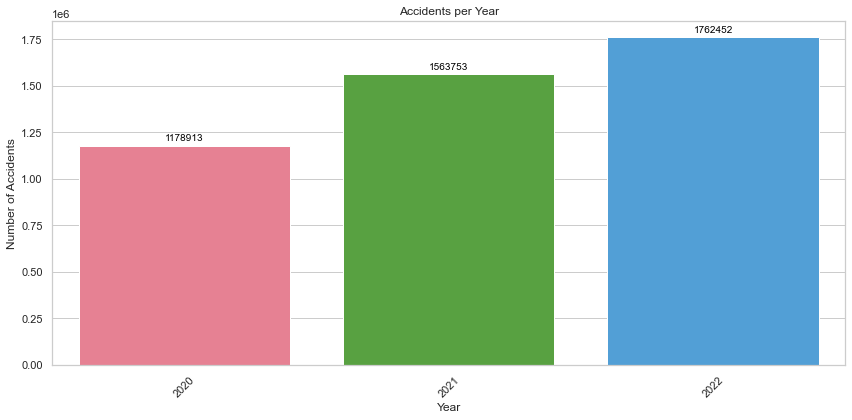

In [ ]:
yearly_accident_counts = df_time.groupby(['Year']).size().reset_index(name='Accident Count')

# Set a custom color palette (optional)
custom_palette = sns.color_palette("husl", len(yearly_accident_counts))

# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a bar plot
ax = sns.barplot(data=yearly_accident_counts, x='Year', y='Accident Count', palette=custom_palette)

# Customize the plot
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

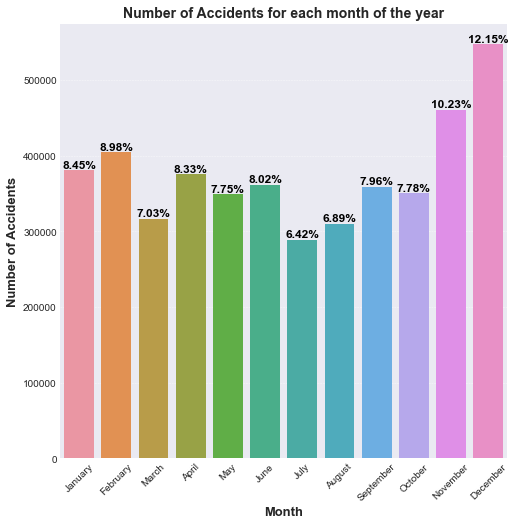

In [ ]:

# Set the style
plt.style.use('seaborn-darkgrid')
custom_palette = sns.color_palette("Accent", 7)
sns.set_palette(custom_palette)

# Create a figure with a specified size
plt.figure(figsize=(8, 8))

# Add a grid with specified properties
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Define the order of days
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a countplot
sns.countplot(x=df_time["Month"], order=order)
total_counts = df_time["Month"].value_counts()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set the x and y axis labels and title
plt.xlabel("Month", fontsize=13, fontweight="bold")
plt.ylabel("Number of Accidents", fontsize=13, fontweight="bold")
plt.title("Number of Accidents for each month of the year", fontsize=14, fontweight="bold")

ax = plt.gca()

# Add percentage labels above the bars
for i, bar in enumerate(ax.patches):
    proportion = (total_counts[order[i]] / total_counts.sum()) * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position at the center of the bar
        bar.get_height() + 500,  # Y position just above the bar
        f'{proportion:.2f}%',  # Text label with two decimal places
        fontsize=12,
        ha='center',  # Horizontal alignment
        va='bottom' if proportion > 5 else 'top',  # Adjust text position based on percentage
        fontweight='bold',
        color='black' if proportion > 5 else 'white'  # Adjust text color for visibility
    )

plt.xticks(rotation=45)
# Display the plot
plt.show()

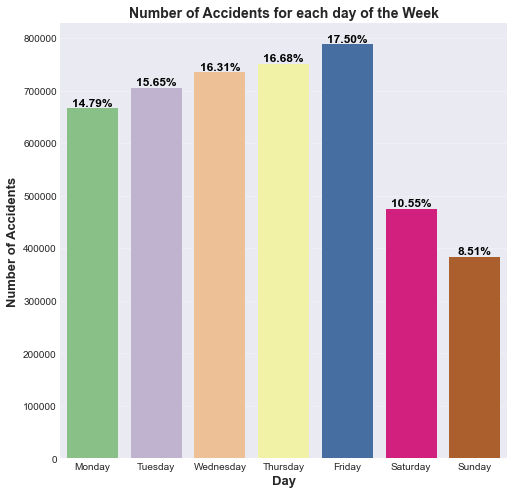

In [ ]:
# Set the style
plt.style.use('seaborn-darkgrid')
custom_palette = sns.color_palette("Accent", 7)
sns.set_palette(custom_palette)

# Create a figure with a specified size
plt.figure(figsize=(8, 8))

# Add a grid with specified properties
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Define the order of days
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a countplot
sns.countplot(x=df_time["Day"], order=order)
total_counts = df_time["Day"].value_counts()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set the x and y axis labels and title
plt.xlabel("Day", fontsize=13, fontweight="bold")
plt.ylabel("Number of Accidents", fontsize=13, fontweight="bold")
plt.title("Number of Accidents for each day of the Week", fontsize=14, fontweight="bold")

ax = plt.gca()

# Add percentage labels above the bars
for i, bar in enumerate(ax.patches):
    proportion = (total_counts[order[i]] / total_counts.sum()) * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position at the center of the bar
        bar.get_height() + 500,  # Y position just above the bar
        f'{proportion:.2f}%',  # Text label with two decimal places
        fontsize=12,
        ha='center',  # Horizontal alignment
        va='bottom' if proportion > 5 else 'top',  # Adjust text position based on percentage
        fontweight='bold',
        color='black' if proportion > 5 else 'white'  # Adjust text color for visibility
    )

# Display the plot
plt.show()

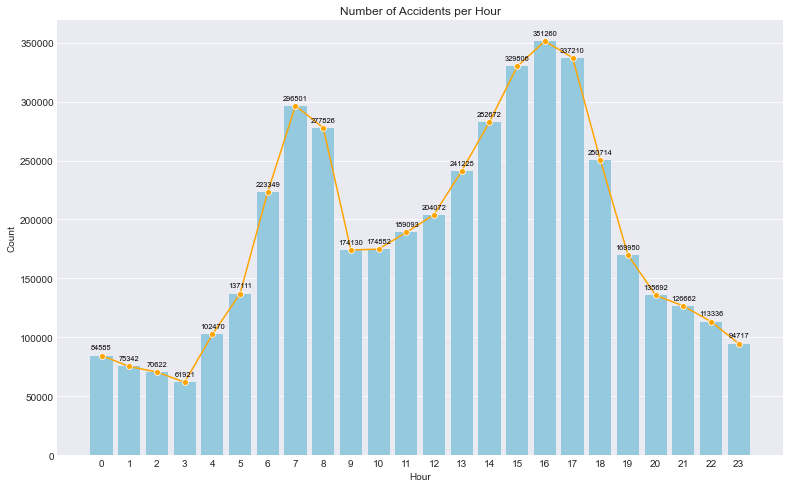

In [ ]:
hour_counts = df_time["Hour"].value_counts().reset_index()
hour_counts.columns = ["Hour", "Count"]
plt.figure(figsize=(13, 8))

# Create a bar plot
ax = sns.barplot(data=hour_counts, x="Hour", y="Count", color="skyblue")

# Add a line plot on top of the bars
sns.lineplot(data=hour_counts, x="Hour", y="Count", marker="o", color="orange", ax=ax)

# Add labels to the bars with adjusted placement
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom' if height > 5 else 'top', fontsize=7.5,
                color='black', xytext=(0, 5 if height > 5 else -5), textcoords='offset points', rotation=0)

plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Number of Accidents per Hour")
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [42]:

def process_fetal_accidents(csv_file_name, year=None):

    state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia' : 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}
    
    fetal = pd.read_csv(csv_file_name)

    fetal.rename(columns={'STATENAME': 'State'}, inplace=True)
    fetal['State'] = fetal['State'].replace(state_abbreviations)
    state_counts = fetal['State'].value_counts().reset_index()
    state_counts.columns = ['State', 'Fatalities']
    if year is not None:
        state_counts['Year'] = year

    return state_counts

fetal2016 = process_fetal_accidents('Accident2017.CSV', 2016)
fetal2017 = process_fetal_accidents('Accident2017.CSV', 2017)
fetal2018 = process_fetal_accidents('Accident2018.csv', 2018)
fetal2019 = process_fetal_accidents('Accident2019.CSV', 2019)
fetal2020 = process_fetal_accidents('Accident2020.csv', 2020)
fetal2021 = process_fetal_accidents('Accident2021.csv', 2021)


C:\Users\Bart\AppData\Local\Temp\ipykernel_18208\1965728502.py:19: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  fetal = pd.read_csv(csv_file_name)
C:\Users\Bart\AppData\Local\Temp\ipykernel_18208\1965728502.py:19: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  fetal = pd.read_csv(csv_file_name)
C:\Users\Bart\AppData\Local\Temp\ipykernel_18208\1965728502.py:19: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  fetal = pd.read_csv(csv_file_name)


In [43]:
fetal = pd.concat([fetal2016, fetal2017, fetal2018, fetal2019, fetal2020, fetal2021], ignore_index=True)
fetal['Year'] = fetal['Year'].astype(str)
#fetal.to_csv('fetal.csv')
#fetal = pd.melt(fetal, id_vars=['State', 'Year'], var_name='Type', value_name='Value')
fetal.head()

,State,Fatalities,Year
0,CA,3569,2016
1,TX,3352,2016
2,FL,2925,2016
3,GA,1440,2016
4,NC,1306,2016


In [44]:
def process_drivers(csv_file_name, year=None):

    state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia' : 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}
    
    drivers = pd.read_csv(csv_file_name)

    drivers.rename(columns={'STATE': 'State'}, inplace=True)
    drivers['State'] = drivers['State'].replace(state_abbreviations)
    drivers.rename(columns={'DRIVERS': 'Drivers'}, inplace=True)
    if year is not None:
        drivers['Year'] = year

    return drivers

drivers2019 = process_drivers('Drivers2019.CSV', 2019)
drivers2020 = process_drivers('Drivers2020.CSV', 2020)
drivers2021 = process_drivers('Drivers2021.csv', 2021)

In [40]:
print(df_drivers_by_state)

   State  Year  Drivers
0     AL  2016  3943082
1     AL  2017  3954378
2     AL  2018  3999057
3     AK  2016   534585
4     AK  2017   534585
..   ...   ...      ...
46    VA  2021  5912644
47    WA  2021  5868509
48    WV  2021  1138290
49    WI  2021  4340851
50    WY  2021   430472

[306 rows x 3 columns]


In [46]:
df_drivers_by_state = pd.read_csv('Licensed_drivers_By_State.csv')
df_drivers_by_state['Cohort'] = df_drivers_by_state['Cohort'].replace(['Under 16', '16', '17', '18', '19'], '16-19')
df_drivers_by_state['Cohort'] = df_drivers_by_state['Cohort'].replace(['20', '21', '22', '23', '24'], '20-24')
df_drivers_by_state = df_drivers_by_state[df_drivers_by_state['Year'].isin([2016, 2017, 2018])]
df_drivers_by_state_GC = df_drivers_by_state.groupby(['State', 'Cohort', 'Gender','Year'])['Drivers'].sum().reset_index()
df_drivers_by_state = df_drivers_by_state.groupby(['State','Year'])['Drivers'].sum().reset_index()


state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia' : 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}


df_drivers_by_state['State'] = df_drivers_by_state['State'].replace(state_abbreviations)
df_drivers_by_state = pd.concat([df_drivers_by_state, drivers2019, drivers2020, drivers2021])
#df_drivers_by_state = df_drivers_by_state.sort_values(by = 'Drivers',ascending=False)


state_accident_counts16 = df[df['Year'] == '2016']['State'].value_counts().reset_index()
state_accident_counts16.columns = ['State', 'Accidents']
state_accident_counts16['Year'] = '2016'
state_accident_counts17 = df[df['Year'] == '2017']['State'].value_counts().reset_index()
state_accident_counts17.columns = ['State', 'Accidents']
state_accident_counts17['Year'] = '2017'
state_accident_counts18 = df[df['Year'] == '2018']['State'].value_counts().reset_index()
state_accident_counts18.columns = ['State', 'Accidents']
state_accident_counts18['Year'] = '2018'
state_accident_counts19 = df[df['Year'] == '2019']['State'].value_counts().reset_index()
state_accident_counts19.columns = ['State', 'Accidents']
state_accident_counts19['Year'] = '2019'
state_accident_counts20 = df[df['Year'] == '2020']['State'].value_counts().reset_index()
state_accident_counts20.columns = ['State', 'Accidents']
state_accident_counts20['Year'] = '2020'
state_accident_counts21 = df[df['Year'] == '2021']['State'].value_counts().reset_index()
state_accident_counts21.columns = ['State', 'Accidents']
state_accident_counts21['Year'] = '2021'
state_accident_count = pd.concat([state_accident_counts16, state_accident_counts17 , state_accident_counts18, state_accident_counts19, state_accident_counts20, state_accident_counts21], ignore_index=True)

df_drivers_by_state['Year'] = df_drivers_by_state['Year'].astype(str)

df_drivers_by_state['Drivers'] = df_drivers_by_state['Drivers'].astype(int)
df_drivers_by_state.dropna()
state_accident_count.dropna()
merged_df = df_drivers_by_state.merge(state_accident_count, on=['State', 'Year'], how='right')
merged_df['Rel_accident'] = merged_df['Drivers'] / merged_df['Accidents']
merged_df = merged_df.merge(fetal, on=['State', 'Year'], how='right')
merged_df['Rel_Fatality'] = merged_df['Drivers'] / merged_df['Fatalities']
merged_df = pd.melt(merged_df, id_vars=['State', 'Year'], var_name='Type', value_name='Value')
merged_df.to_csv('drivers.csv')



In [ ]:
df_drivers_by_state = pd.read_csv('Licensed_drivers_By_State.csv')
df_drivers_by_state['Cohort'] = df_drivers_by_state['Cohort'].replace(['Under 16', '16', '17', '18', '19'], '16-19')
df_drivers_by_state['Cohort'] = df_drivers_by_state['Cohort'].replace(['20', '21', '22', '23', '24'], '20-24')
df_drivers_by_state = df_drivers_by_state[df_drivers_by_state['Year'].isin([2016, 2017, 2018, 2019, 2020, 2021])]
df_drivers_by_state_GC = df_drivers_by_state.groupby(['State', 'Cohort', 'Gender','Year'])['Drivers'].sum().reset_index()
df_drivers_by_state = df_drivers_by_state.groupby(['State','Year'])['Drivers'].sum().reset_index()

state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia' : 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}


df_drivers_by_state['State'] = df_drivers_by_state['State'].replace(state_abbreviations)
df_drivers_by_state = df_drivers_by_state.sort_values(by = 'Drivers',ascending=False)

state_accident_counts16 = df[df['Year'] == '2016']['State'].value_counts().reset_index()
state_accident_counts16.columns = ['State', 'Accidents']
state_accident_counts16['Year'] = '2016'
state_accident_counts17 = df[df['Year'] == '2017']['State'].value_counts().reset_index()
state_accident_counts17.columns = ['State', 'Accidents']
state_accident_counts17['Year'] = '2017'
state_accident_counts18 = df[df['Year'] == '2018']['State'].value_counts().reset_index()
state_accident_counts18.columns = ['State', 'Accidents']
state_accident_counts18['Year'] = '2018'
state_accident_count = pd.concat([state_accident_counts16, state_accident_counts17 , state_accident_counts18], ignore_index=True)

df_drivers_by_state['Year'] = df_drivers_by_state['Year'].astype(str)

df_drivers_by_state['Drivers'] = df_drivers_by_state['Drivers'].astype(int)
df_drivers_by_state.dropna()
state_accident_count.dropna()
#df_state_accident_counts = pd.DataFrame({'Accident_counts': state_accident_counts})
#df_state_accident_counts = df_state_accident_counts.dropna(subset=['Accident_counts'])
#df_state_accident_counts = df_state_accident_counts.rename_axis('State').reset_index()
merged_df = df_drivers_by_state.merge(state_accident_count, on=['State', 'Year'], how='left')
merged_df['Ratio_accident'] = merged_df['Drivers'] / merged_df['Accidents']
#merged_df['Accidents_per_driver'] = merged_df['Accident_counts'] / merged_df['Drivers'] 
#merged_df = merged_df.dropna(subset=['Drivers_per_accident'])
#merged_df = merged_df.dropna(subset=['Accidents_per_driver'])
merged_df = merged_df.merge(fetal, on=['State', 'Year'], how='left')
merged_df['Ratio_Fetal'] = merged_df['Drivers'] / merged_df['Fetal']
#merged_df = pd.melt(merged_df, id_vars=['State', 'Year'], var_name='Type', value_name='Value')
merged_df.head()
merged_df = merged_df.sort_values(by = 'Ratio_Fetal',ascending=False)
merged_df.head(15)
merged_df.to_csv('drivers.csv')
#merged_df.merge(fetal, on = ['State', 'Year'])
#ldrivers.head(20)
#df_drivers_by_state.to_csv('Licensed_drivers.csv')


In [9]:
def process_demo(csv_file_name, year=None):

   
    age = pd.read_csv(csv_file_name)
    age['Year'] = year

    return age

age2016 = process_demo('Age2016.CSV', 2016)
age2017 = process_demo('Age2017.CSV', 2017)
age2018 = process_demo('Age2018.csv', 2018)
age2019 = process_demo('Age2019.CSV', 2019)
age2020 = process_demo('Age2020.CSV', 2020)
age2021 = process_demo('Age2021.csv', 2021)

age = pd.concat([age2016, age2017, age2018, age2019, age2020, age2021])
age = age.dropna(axis=1, how= 'all')
age.to_csv('Age.csv')
print(age)

      Age          Type  Gender   Count  Year
0     <15    Fetalities    Male    58.0  2016
1   15-20    Fetalities    Male  3157.0  2016
2   21-24    Fetalities    Male  3897.0  2016
3   25-34    Fetalities    Male  8065.0  2016
4   35-44    Fetalities    Male  6140.0  2016
..    ...           ...     ...     ...   ...
67  35-44  IR_Accidents  Female  3917.0  2021
68  45-54  IR_Accidents  Female  3193.0  2021
69  55-64  IR_Accidents  Female  2488.0  2021
70  65-74  IR_Accidents  Female  1997.0  2021
71    >74  IR_Accidents  Female  1565.0  2021

[432 rows x 5 columns]


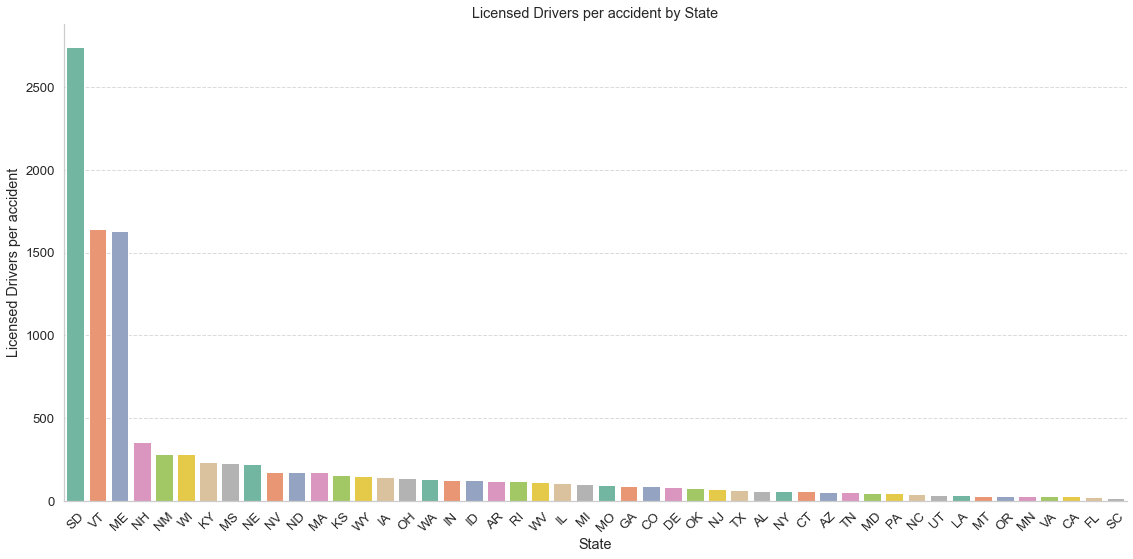

In [ ]:
sns.set(font_scale=1.2)  # Adjust the font scale
sns.set_style("whitegrid")  # Use a white grid background

# Sort the DataFrame
df_sorted = merged_df.sort_values(by='Drivers_per_accident', ascending=False)

# Create the bar plot
plt.figure(figsize=(16, 8))  # Adjust the figure size
ax = sns.barplot(x='State', y='Drivers_per_accident', data=df_sorted, palette='Set2')  # Use the 'Set2' color palette

# Add labels and title
ax.set_xlabel('State')
ax.set_ylabel('Licensed Drivers per accident')
ax.set_title('Licensed Drivers per accident by State')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)#, horizontalalignment='right')

# Customize grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Add a horizontal line at y=0 for reference
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

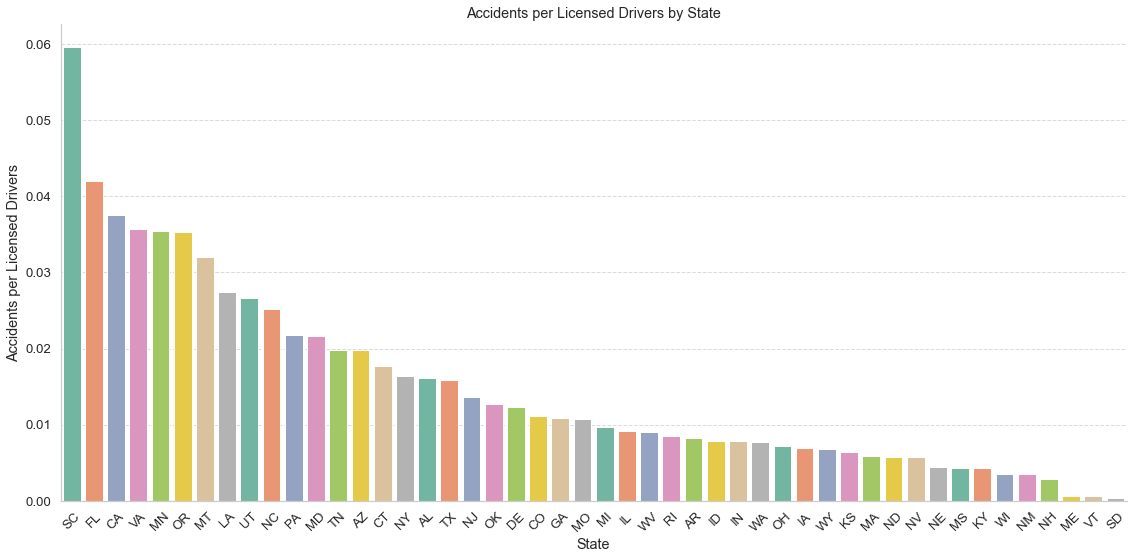

In [ ]:
sns.set(font_scale=1.2)  # Adjust the font scale
sns.set_style("whitegrid")  # Use a white grid background

# Sort the DataFrame
df_sorted = merged_df.sort_values(by='Accidents_per_driver', ascending=False)

# Create the bar plot
plt.figure(figsize=(16, 8))  # Adjust the figure size
ax = sns.barplot(x='State', y='Accidents_per_driver', data=df_sorted, palette='Set2')  # Use the 'Set2' color palette

# Add labels and title
ax.set_xlabel('State')
ax.set_ylabel('Accidents per Licensed Drivers')
ax.set_title('Accidents per Licensed Drivers by State')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)#, horizontalalignment='right')

# Customize grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Add a horizontal line at y=0 for reference
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

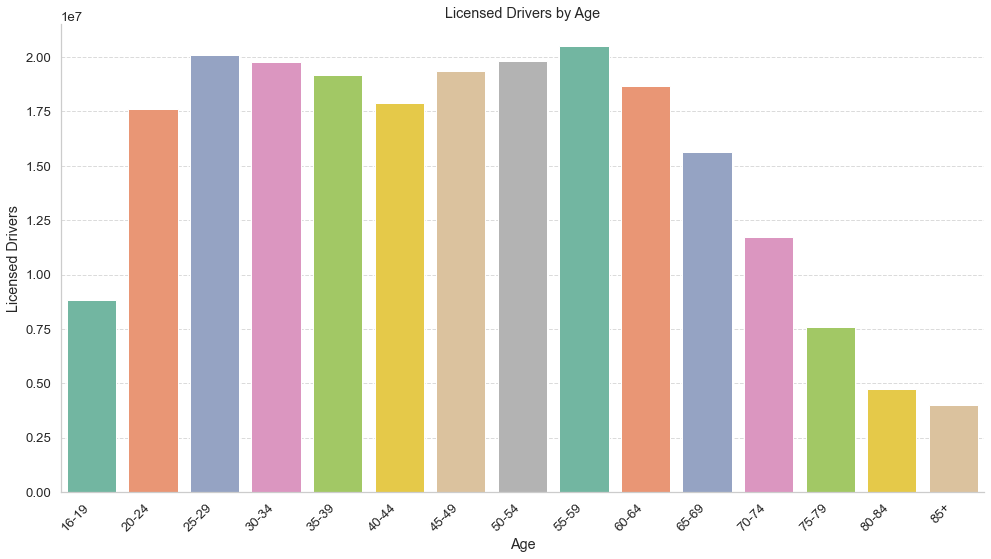

In [ ]:
sns.set(font_scale=1.2)  # Adjust the font scale
sns.set_style("whitegrid")  # Use a white grid background

# Sort the DataFrame
#df_sorted = merged_df.sort_values(by='Accidents_per_driver', ascending=False)

# Create the bar plot
plt.figure(figsize=(14, 8))  # Adjust the figure size
ax = sns.barplot(x='Cohort', y='Drivers', data=cohort, palette='Set2')  # Use the 'Set2' color palette

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Licensed Drivers')
ax.set_title('Licensed Drivers by Age')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Customize grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Add a horizontal line at y=0 for reference
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

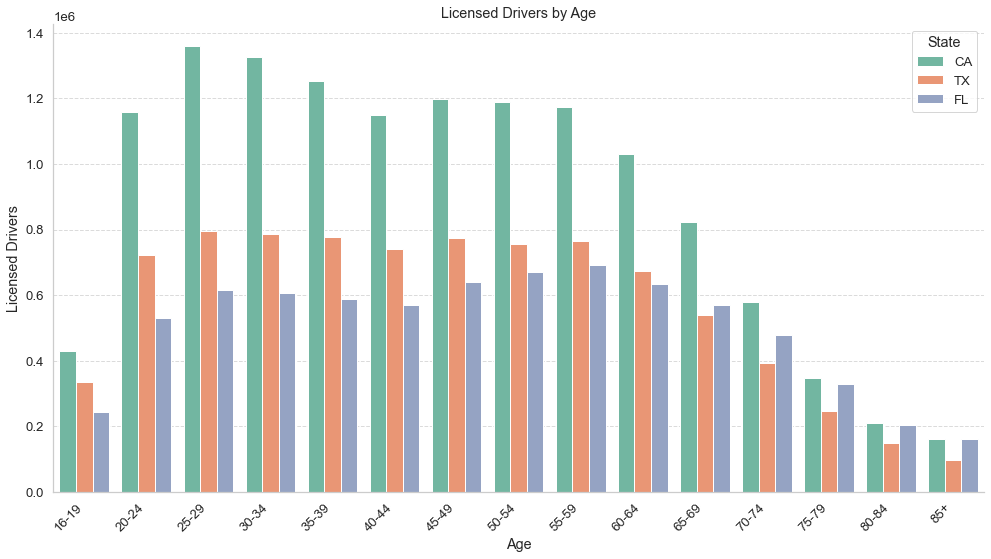

In [ ]:
cohort_t3 = ldrivers[ldrivers['State'].isin(['CA', 'TX', 'FL'])]

sns.set(font_scale=1.2)  # Adjust the font scale
sns.set_style("whitegrid")  # Use a white grid background

# Sort the DataFrame
#df_sorted = merged_df.sort_values(by='Accidents_per_driver', ascending=False)

# Create the bar plot
plt.figure(figsize=(14, 8))  # Adjust the figure size
ax = sns.barplot(x='Cohort', y='Drivers', data=cohort_t3, hue = 'State', palette='Set2', ci=None)  # Use the 'Set2' color palette

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Licensed Drivers')
ax.set_title('Licensed Drivers by Age')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Customize grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Add a horizontal line at y=0 for reference
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

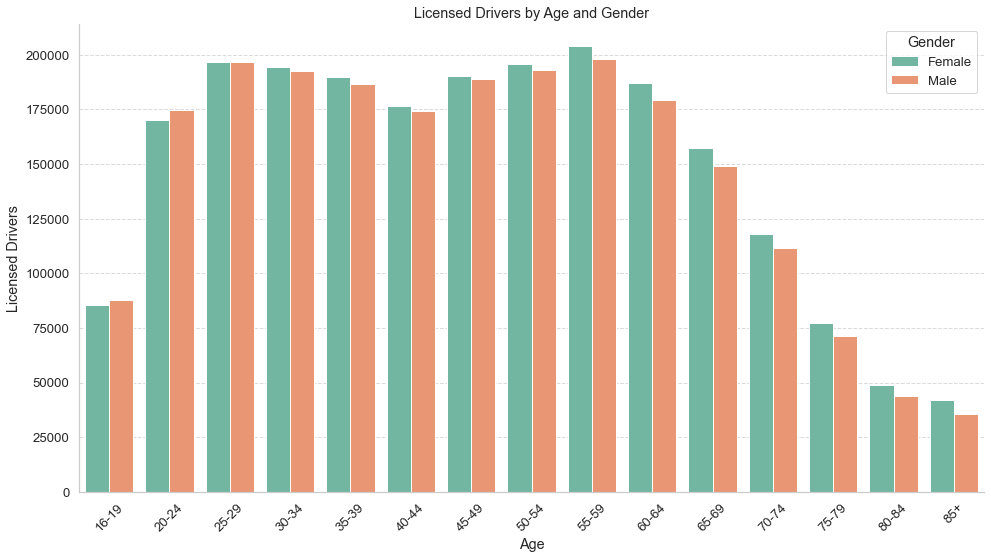

In [ ]:

sns.set(font_scale=1.2)  # Adjust the font scale
sns.set_style("whitegrid")  # Use a white grid background

# Sort the DataFrame
#df_sorted = merged_df.sort_values(by='Accidents_per_driver', ascending=False)

# Create the bar plot
plt.figure(figsize=(14, 8))  # Adjust the figure size
ax = sns.barplot(x='Cohort', y='Drivers', data=ldrivers, hue = 'Gender', palette='Set2', ci=None)  # Use the 'Set2' color palette

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Licensed Drivers')
ax.set_title('Licensed Drivers by Age and Gender')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)#, horizontalalignment='right')

# Customize grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Add a horizontal line at y=0 for reference
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

Data op individuele staten (Quint & Doena)

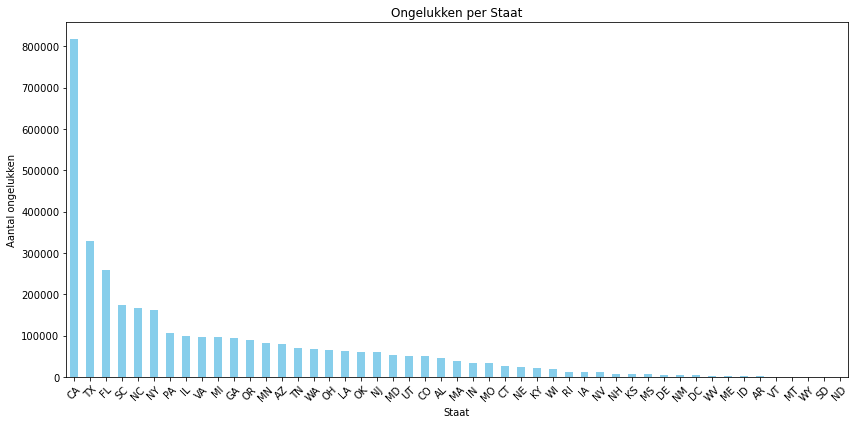

In [ ]:
state_accident_counts = df['State'].value_counts()

plt.figure(figsize=(12, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Staat')
plt.xlabel('Staat')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()



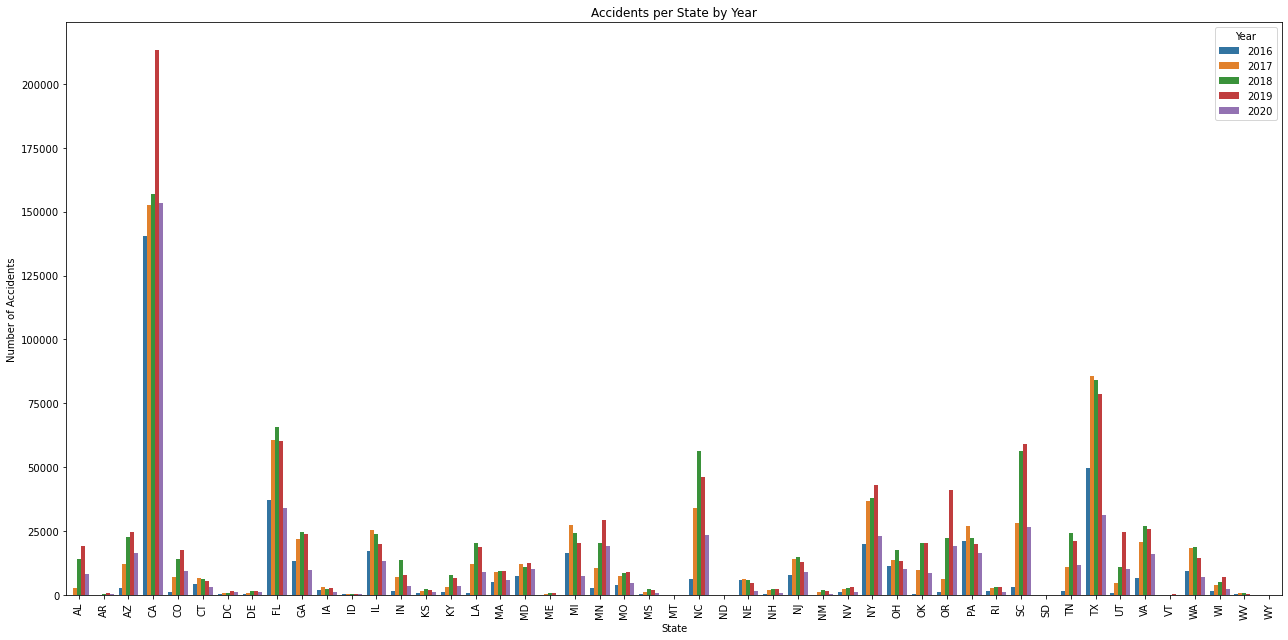

In [ ]:
df['Year'] = pd.to_datetime(df['Start_Time']).dt.year

# Group by 'State', 'Year', and calculate the accident counts
state_year_accident_counts = df.groupby(['State', 'Year']).size().reset_index(name='accident_count')

plt.figure(figsize=(18, 9))

# Create a bar chart using seaborn with 'State' on the x-axis and 'Year' as hue
sns.barplot(data=state_year_accident_counts, x='State', y='accident_count', hue='Year')

plt.title('Accidents per State by Year')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()

Isabel:

In [ ]:
#leuk coderen

Sophia met weer enzo:

In [ ]:
#leuker coderen